# Customer Experience Analysis at E-commerce company
As an e-commerce company whose revenue is generated from sales charge by sellers, it's important to manage customer experience in order to encourage customers' purchase. Condisering the same product is being sold in a different shopping platform with a similar price range, keeping customers satisfaction rate high is very important. What is the main factor that affect customer shopping experience most, and what are the action plan we can take?
The dataset has been provided by a Brazilian online e-commerce company, Olist, and has been accumulated over the past 2 years from Sep 2016 to Sep 2018.

### Table of Contents
1. Data Preprocessing
2. Exploratory Data Analysis
3. Classification & Permutation Feature Importance
3. Conclusion & Action Plan

### 1. Data Preprocessing

In [133]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import matplotlib.patches as mpatches
from wordcloud import WordCloud
from wordcloud import STOPWORDS
pd.set_option('display.max_columns', 100)

In [134]:
items = pd.read_csv("olist_order_items_dataset.csv")
review = pd.read_csv("olist_order_reviews_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
payment = pd.read_csv("olist_order_payments_dataset.csv")
translate = pd.read_csv("product_category_name_translation.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")

df = pd.merge(review, items, on= 'order_id', how = 'inner')
df= df.merge(product, on = 'product_id', how = 'inner')
df= df.merge(orders, on = 'order_id', how = 'inner')
df= df.merge(payment, on = 'order_id', how = 'inner')
df = df.merge(customers, on = 'customer_id', how = 'inner')
df = pd.merge(df, sellers, on = 'seller_id', how = 'inner')
df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.0,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,1,credit_card,8,397.26,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,14600,sao joaquim da barra,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.0,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,1,credit_card,8,397.26,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,14600,sao joaquim da barra,SP
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,NaN,NaN,2018-04-10 00:00:00,2018-04-11 11:30:43,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-04-02 11:15:38,185.0,20.26,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,b1757da2a461d581e1a3b280ca181b7c,delivered,2018-03-26 11:02:31,2018-03-26 11:15:38,2018-03-26 22:58:37,2018-04-09 21:53:23,2018-04-27 00:00:00,1,credit_card,3,205.26,059ba8400bf965adf606ecc7ef3396e9,95860,taquari,RS,14600,sao joaquim da barra,SP
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,NaN,NaN,2017-12-28 00:00:00,2017-12-30 12:07:50,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2017-12-14 20:51:05,185.0,17.05,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,da2bd16b131bc90653b87fe4d8fd266e,delivered,2017-12-07 20:33:24,2017-12-07 20:51:05,2017-12-08 18:12:34,2017-12-27 18:19:53,2018-01-08 00:00:00,1,credit_card,2,202.05,62a25a159f9fd2ab7c882d9407f49aa9,36500,uba,MG,14600,sao joaquim da barra,SP
4,5fdb2ed7aa0f1b1c9642175b302e38af,b0bc656fed47584c160f8cff2d7b8bbd,5,NaN,NaN,2018-03-17 00:00:00,2018-03-17 17:36:27,1,1acb18fc869c5489d5f76abcd681165e,6d803cb79cc31c41c4c789a75933b3c7,2018-03-06 14:10:22,135.0,18.20,esporte_lazer,47.0,858.0,1.0,1600.0,30.0,30.0,35.0,f4ad1c9eb0bed4469cbe0ff8f47bf634,delivered,2018-02-27 13:56:12,2018-02-27 14:10:22,2018-02-27 23:04:47,2018-03-16 14:16:19,2018-03-23 00:00:00,1,credit_card,1,306.40,86243f3e50e3b844b1d7bd850c4d2623,38412,uberlandia,MG,14600,sao joaquim da barra,SP


In [135]:
# replacing Portuguese category names with English names

df = df.join(translate.set_index('product_category_name')['product_category_name_english'], on = 'product_category_name')
df.drop(columns = 'product_category_name', inplace = True)
df.rename({'product_category_name_english': 'product_category'},axis= "columns", inplace = True)
df['product_category'].sample(3)

28784     housewares
30720     stationery
13714    electronics
Name: product_category, dtype: object

In [136]:
# checking for datatypes - datetime & category

dtime = ['review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 
         'order_estimated_delivery_date', 'order_approved_at']

for d in dtime:
    df[d] = df[d].astype('datetime64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      118315 non-null  object        
 1   order_id                       118315 non-null  object        
 2   review_score                   118315 non-null  int64         
 3   review_comment_title           14089 non-null   object        
 4   review_comment_message         50665 non-null   object        
 5   review_creation_date           118315 non-null  datetime64[ns]
 6   review_answer_timestamp        118315 non-null  datetime64[ns]
 7   order_item_id                  118315 non-null  int64         
 8   product_id                     118315 non-null  object        
 9   seller_id                      118315 non-null  object        
 10  shipping_limit_date            118315 non-null  object        
 11  

In [137]:
# checking for missing values in all columns

df['product_category'] = df['product_category'].fillna("no_data")

avg = ['product_description_lenght', 'product_photos_qty', 'product_name_lenght','product_weight_g', 'product_height_cm', 'product_length_cm', 'product_width_cm']
review = ['review_comment_title', 'review_comment_message']

for i in avg:
    df[i].fillna(df[i].mean(), inplace = True)
        
for a in review:
    df[a].fillna('NA', inplace= True)

# handling missing values

df["order_approved_at"].fillna(df["order_purchase_timestamp"], inplace=True)
df["order_estimated_delivery_date"].fillna(df["order_delivered_customer_date"], inplace=True)
df['order_delivered_carrier_date'].fillna(df['order_approved_at'], inplace = True)
df['order_delivered_customer_date'].fillna(df["order_estimated_delivery_date"], inplace = True)

df.isna().sum()

review_id                        0
order_id                         0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type        

In [138]:
# removing duplicates

df.drop_duplicates(subset = {'order_id', 'product_id', 'order_item_id'}, inplace = True)

### 2. Exploratory Data Analysis

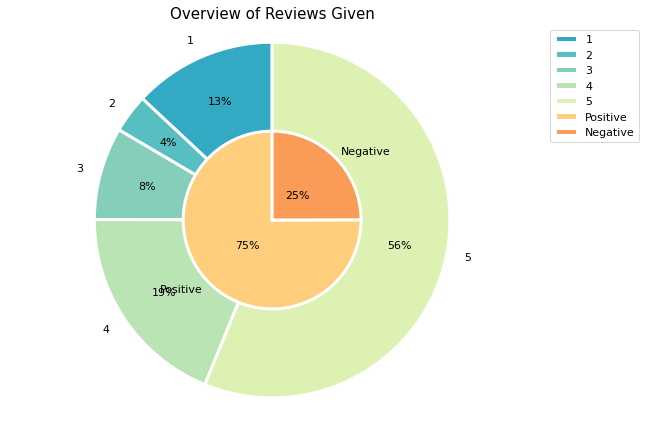

In [139]:
# Let's first divide positive reviews with score higher than 3, and negative reviews with score lower than 3.

def division(x):
    if x<=3:
        return "1"
    else: return "0"

df['reaction'] = df['review_score'].apply(division)
df['reaction'] =df['reaction'].astype(int)

palette = sns.color_palette("Paired", 2)
palette_o = sns.color_palette("YlGnBu", 10)
palette_i = sns.color_palette("Spectral",10)

outer = [palette_o[5],palette_o[4],palette_o[3],palette_o[2], palette_o[1]]
inner = [palette_i[3], palette_i[2]]
color_list = [palette[0], palette[1]]

number = df['review_score'].value_counts().sort_index(ascending=True).values
labels_2 = ['1','2', '3', '4', '5']
x2 = [number[0],number[1], number[2], number[3], number[4]]
labels_3 =['Positive','Negative']
x3 = [df['reaction'].value_counts().values[0],df['reaction'].value_counts().values[1]]

plt.figure(figsize=(9,6))
plt.pie(x2,startangle=90, labels = labels_2, pctdistance =0.73,colors=outer,textprops ={'fontsize':11},
        wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" }, autopct = '%1.0f%%',radius= 0.4)
plt.pie(x3,startangle=90, labels = labels_3, pctdistance =0.4,colors=inner,textprops ={'fontsize':11},
        wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" }, autopct = '%1.0f%%',radius= 0.2 )
plt.axis('equal') 
plt.legend(loc=1, bbox_to_anchor=(0.8, 0., 0.4, 1), fontsize =11)
plt.title("Overview of Reviews Given", size = 15)
plt.tight_layout();

I have classified score 4,5 as Positive reaction and 3,4,5 as Negative reaction.
Most, 75%, of the reviews are positive while only 25% is negative. It means that we have an imbalanced dataset that requires attention in the machine learning part later!

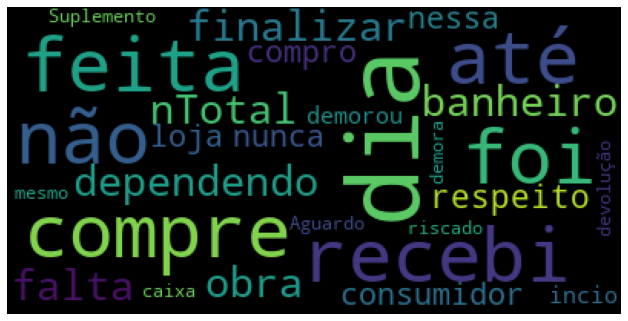

In [140]:
stopwords = {'para', 'mas', 'do', 'e', 'em','um','dezembro','produtos', 'uma', 'todos', "NA'",'lado', 'estou', 'pra', 'ou','de', 'o', 'a', 'no', 'nan', 'Quero', 'ate','os','NA',
             'quase', 'produto','vieram','aqui', 'veio', 'mes', 'so', 'ano', 'eu', 'un', 'dizer', "un'",'acabou', 'contudo','outro', 'nQuer','pois','chegar','passado', "outro'",
            'unidades', 'hoje', 'r', 'n', 'comprei', 'que', 'apos', 'mais', 'apos', 'tive', 'com', 'meu', 'q', 'boa', 'fizerao', 'isso', 'dele', 'mim', '200g', 'vida', 'compra',
            'lannister', 'seja', 'aumentei', 'valor', 'universal', 'creatina', 'dá', 'Daí', 'só', 'sem','Estão', 'além', 'chegaria', 'demais'}

below_3 = df[df['review_score']<3]
text = below_3['review_comment_message'].values
wordcloud = WordCloud(stopwords=stopwords)
wordcloud = wordcloud.generate(str(text))
plt.figure(figsize = (11,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Here I have used Wordcloud to analyse what exactly customers left on the comment. After removing less relevant sentences I have categorized the main cause of negative experience as below;

1. Wrong delivery (Seller missed some of the ordered products, or broken / wrong product has been delivered):
quantitade, unidade (amount), errada (wrong), faltando (missing), direoto (right), sem (lack), riscado (damaged) -> product count that is ordered simultaneously, seller score, selling count

2. Delayed delivery: 
ainda (not yet), entrega, demora (delivery), correio (post), frete (freight), chegou (has arrived), sem (week), tarde, atrasado, demorou (late), nAguardo (I wait) -> Delivery hours, regions

Based on this prior knowledge we are going to proceed with an analysis.

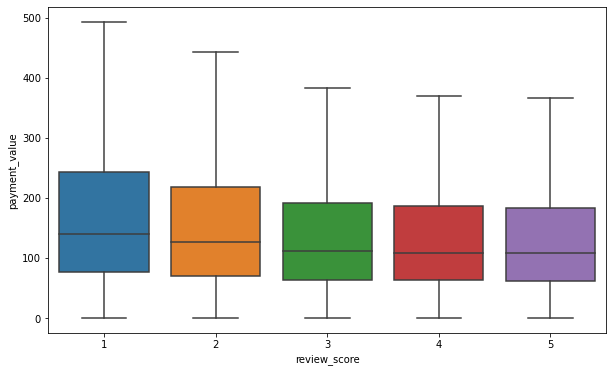

In [141]:
plt.figure(figsize = (10,6))
sns.boxplot(df['review_score'], df['payment_value'], showfliers=False);

Every point of box plot, from 1 IQR to 4 IQR are higher in lower score than higher score. This means that customers who purchased more expensitve stuff tend to write negative reviews, probably because of high expectations. 

In [142]:
df.groupby('review_score')['product_description_lenght'].agg(['mean', 'std'])

,mean,std
review_score,,
1,778.505136,653.949742
2,738.706227,602.899209
3,771.605810,637.862873
4,794.622211,641.463678
5,793.214372,651.922058


Products description length tends to be shorter for negative customer experience. This is probably because product page failed to provide detailed explanation, leading to customers' false expectation. Or it's just reflects that a seller doesn't pay much attention to overall sales activity, not only product page creation but also delivery etc. (but not a big difference)

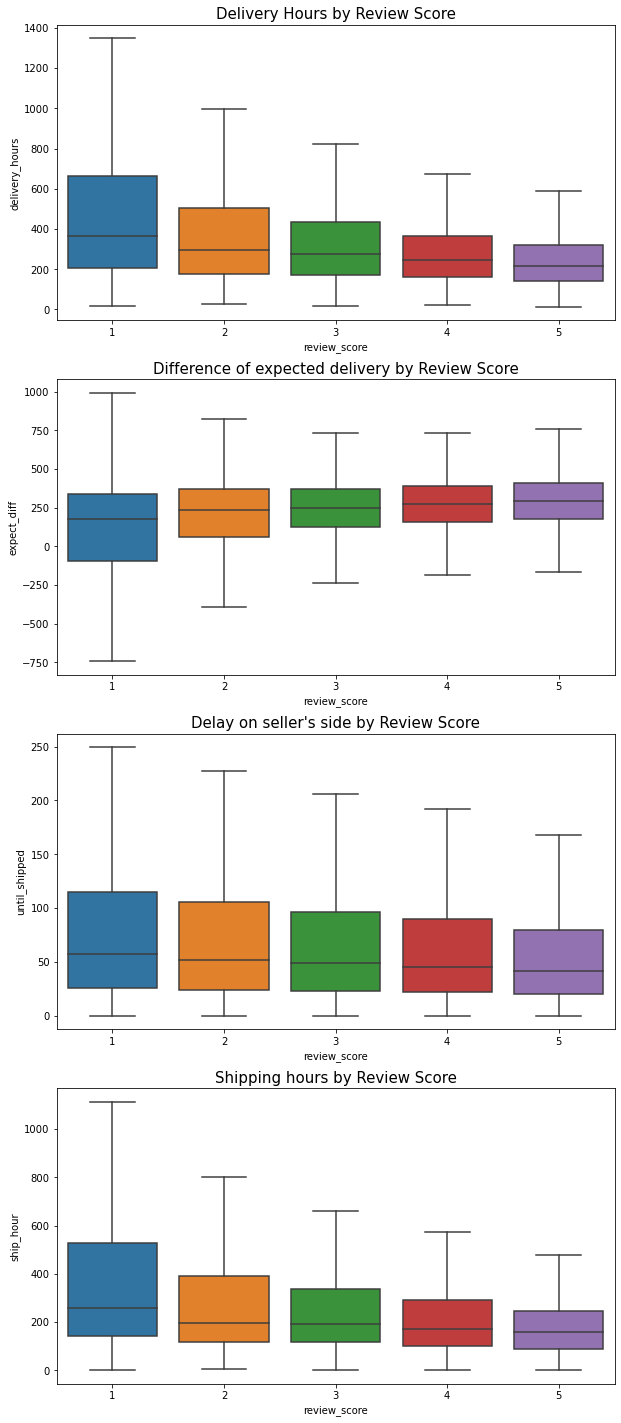

In [143]:
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_approved_at']
df['delivery_hours'] = df['delivery_time'].apply(lambda x: x/np.timedelta64(1,'h'))
df = df.query('delivery_hours > 0') 

df['delivery_time'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['expect_diff'] = df['delivery_time'].apply(lambda x: x/np.timedelta64(1,'h'))

df['delivery_time'] = df['order_delivered_carrier_date'] - df['order_approved_at']
df['until_shipped'] = df['delivery_time'].apply(lambda x: x/np.timedelta64(1,'h'))
df = df.query('until_shipped > 0') 

df['delivery_time'] = df['order_delivered_customer_date'] - df['order_delivered_carrier_date']
df['ship_hour'] = df['delivery_time'].apply(lambda x: x/np.timedelta64(1,'h'))
df = df.query('ship_hour > 0') 

seller_delivery_hours = df.groupby(['seller_id'])['delivery_hours'].agg(['mean','sum','std', 'min', 'max','median']).add_suffix("__delivery_hour")
df = pd.merge(df, seller_delivery_hours, on = ['seller_id'])

plt.figure(figsize =(10,25))
plt.subplot(4,1,1)
sns.boxplot(df['review_score'], df['delivery_hours'], showfliers = False)
plt.title("Delivery Hours by Review Score", size = 15)

ax_0 = plt.subplot(4,1,2)
sns.boxplot(df['review_score'], df['expect_diff'], showfliers = False, ax= ax_0)
plt.title("Difference of expected delivery by Review Score", size = 15)
ax_1 = plt.subplot(4,1,3)
sns.boxplot(df['review_score'], df['until_shipped'], showfliers = False, ax = ax_1)
plt.title("Delay on seller's side by Review Score", size = 15)

ax_2 = plt.subplot(4,1,4)
sns.boxplot(df['review_score'], df['ship_hour'], showfliers = False, ax = ax_2)
plt.title("Shipping hours by Review Score", size = 15);

We can easily guess that customer experience is heavily influenced by delivery duration. This is true for the significant difference between expected delivery and actual delivery, and a delay made by seller until the product is shipped out, and actual shipping duration

In [144]:
df_merge = df.groupby(['product_category'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_product_category')
df = pd.merge(df, df_merge, on = 'product_category', how = 'left')

df.groupby(['product_category'])['review_score'].agg(['mean', 'std']).sort_values(by ='mean', ascending = True)

,mean,std
product_category,,
security_and_services,2.500000,2.121320
diapers_and_hygiene,3.315789,1.526438
home_comfort_2,3.366667,1.751518
office_furniture,3.500300,1.526593
fashion_male_clothing,3.692913,1.673850
...,...,...
costruction_tools_tools,4.392157,1.178662
books_imported,4.490909,1.152658
books_general_interest,4.495274,1.053708


Mean & standard deviation of review score varies in each product category. We have already seen that products with higher unit price is related to lower customer satisfaction score. However this table doens't particularly show the connection between price and customer satisfaction. I don't think diapers are more expensive than children clothes. Therefore the difference in product category is due to issues with product or seller.

In [145]:
df_merge = df.groupby(['payment_type'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_payment_type')
df = pd.merge(df, df_merge, on = 'payment_type', how = 'left')

df.groupby(['payment_type'])['review_score'].agg(['mean', 'std'])

,mean,std
payment_type,,
boleto,4.036707,1.375840
credit_card,4.041398,1.379713
debit_card,4.177518,1.297650
voucher,4.020841,1.399365


Customers who paid with debit card got satisfied more than others with different payment types. Voucher, in contrary, is likely to cause more trouble in expiry date, transaction amount etc, which could have led lower satisfaction score.

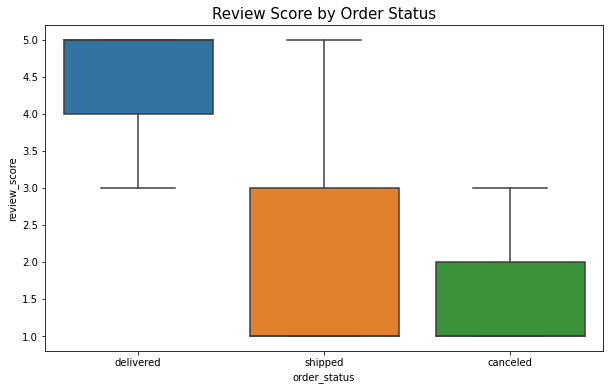

In [146]:
plt.figure(figsize =(10,6))
sns.boxplot(df['order_status'], df['review_score'], showfliers = False)
plt.title("Review Score by Order Status", size = 15);

Orders with shipped & canceled status obviously got a low review score, since it means the orders ended up with shipped & canceled status without successfully delivering.

In [147]:
df_merge = df.groupby(['customer_state'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_customer_state')
df = pd.merge(df, df_merge, on = 'customer_state', how = 'left')

df.groupby(['customer_state'])['review_score'].agg(['mean', 'std']).sort_values(by ='mean', ascending = True)

,mean,std
customer_state,,
RR,3.580000,1.591944
MA,3.693928,1.542371
PA,3.761054,1.506204
AL,3.777778,1.509957
BA,3.795100,1.474359
RJ,3.801483,1.553519
CE,3.814969,1.493768
SE,3.827225,1.534038
PI,3.935361,1.415427


There are differences in mean score between states. Given that customer satisfaction score is highly affected by delivery hours, this could be caused by logistics infrastructure in each state.

In [148]:
df['review_year'] = df['review_answer_timestamp'].dt.year
df['review_month'] = df['review_answer_timestamp'].dt.month
df['review_dayofweek'] = df['review_answer_timestamp'].dt.dayofweek
df['review_day'] = df['review_answer_timestamp'].dt.day
df['review_hour'] = df['review_answer_timestamp'].dt.hour
df['review_month'] = df.review_month.map("{:02}".format)
df['review_year'] = df.review_year.map("{:02}".format)
df['review_ym'] = df['review_year'].astype(str) + df['review_month'].astype(str)

df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.dayofweek
df['purchase_day'] = df['order_purchase_timestamp'].dt.day
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour

In [149]:
df_merge = df.groupby(['review_dayofweek'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_review_dayofweek')
df = pd.merge(df, df_merge, on = 'review_dayofweek', how = 'left')

df.groupby(['review_dayofweek'])['review_score'].agg(['mean', 'std'])

,mean,std
review_dayofweek,,
0,4.001410,1.394727
1,4.045603,1.364108
2,4.051565,1.376557
3,4.052758,1.371199
4,4.059714,1.367101
5,4.071868,1.359995
6,4.006305,1.415288


Surprisingly customers tend to get more negative on Sunday when writing a review. (day 0) As the week progresses they get more positive until Friday, and become less happy on Saturday (day 6). 

In [150]:
df_merge = df.groupby(['review_month'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_review_month')
df = pd.merge(df, df_merge, on = 'review_month', how = 'left')

df.groupby('review_month')['review_score'].agg(['mean', 'std'])

,mean,std
review_month,,
01,3.990287,1.412904
02,3.999399,1.400511
03,3.785247,1.520313
04,3.864671,1.487934
05,4.117300,1.321258
06,4.110201,1.325506
07,4.203251,1.262076
08,4.203369,1.263109
09,4.201394,1.255079


Customers tend to give higher score when the weather is not very cold between May and October

In [151]:
df_merge = df.groupby(['review_hour'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_review_hour')
df = pd.merge(df, df_merge, on = 'review_hour', how = 'left')

df.groupby('review_hour')['review_score'].agg(['mean', 'std'])

,mean,std
review_hour,,
0,4.180062,1.270332
1,4.176704,1.274994
2,4.135096,1.314620
3,3.978288,1.446852
4,3.772397,1.559746
5,3.653355,1.604882
6,3.895879,1.544276
7,3.830986,1.556595
8,3.904884,1.438398


Customers tend to be more generous at night, ranging from 17 hrs to 2 hrs

In [152]:
# returning customer?

df['purchase_month'] = df.purchase_month.map("{:02}".format)
df['purchase_year'] = df.purchase_year.map("{:02}".format)
df['purchase_day'] = df.purchase_day.map("{:02}".format)
df['purchase_hour'] = df.purchase_hour.map("{:02}".format)
df['purchase_ym'] = df['purchase_year'].astype(str) + df['purchase_month'].astype(str)

df['order_purchase_date'] = df['purchase_year'].astype(str) + df['purchase_month'].astype(str) + df['purchase_day'].astype(str)+ df['purchase_hour'].astype(str)
min_purchase = df.groupby('customer_unique_id').order_purchase_date.min().reset_index()
min_purchase.columns = ['customer_unique_id', 'min_timestamp']
df = pd.merge(df, min_purchase, on = 'customer_unique_id')
df['usertype'] = 'New'
df.loc[df['order_purchase_date']>df['min_timestamp'], 'usertype'] = 'Existing'

In [153]:
df_merge = df.groupby(['usertype'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_usertype')
df = pd.merge(df, df_merge, on = 'usertype', how = 'left')

df.groupby('usertype')['review_score'].agg(['mean', 'std'])

,mean,std
usertype,,
Existing,4.214084,1.282072
New,4.037390,1.380512


Existing (= returning) customers are more likely to give a higher score. That probably explains why customers came back for second+ purchase, as their first experience with our platform was good.

In [154]:
# repurchase?

first_purchase = df.groupby(['customer_unique_id', 'product_id']).order_purchase_date.min().reset_index()
first_purchase.columns = ['customer_unique_id', 'product_id', 'min_purchase_date']
df = pd.merge(df, first_purchase, on = ['customer_unique_id', 'product_id'])
df['repurchase'] = 'first'
df.loc[df['order_purchase_date']>df['min_purchase_date'], 'repurchase'] = 'second+'

df_merge = df.groupby(['repurchase'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_repurchase')
df = pd.merge(df, df_merge, on = 'repurchase', how = 'left')
df.groupby('repurchase')['review_score'].agg(['mean', 'std'])

,mean,std
repurchase,,
first,4.041658,1.378410
second+,4.104082,1.363932


What if a customer repurchased the same product in his/her next purchase? It seems mean score doesn't change much.

In [155]:
df['same_region'] = df.apply(lambda row: "Same" if row['customer_state'] == row['seller_state'] else "Different", axis = 1)
df_merge = df.groupby(['same_region'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_same_region')
df = pd.merge(df, df_merge, on = 'same_region', how = 'left')

df.groupby('same_region')['review_score'].agg(['mean', 'std'])

,mean,std
same_region,,
Different,3.971274,1.420260
Same,4.167336,1.291173


When a seller and a buyer lives in the same place the satisfaction score is slightly higher, probably because of shorter delivery hours

In [156]:
user_count = df.groupby('customer_unique_id')['order_id'].count().reset_index()
user_count.columns = ['customer_unique_id', 'user_count']
df = pd.merge(df, user_count, on = 'customer_unique_id')

df = df.sort_values('order_purchase_timestamp')
df['past_purchase_count'] = df.groupby('customer_unique_id')['order_id'].transform(lambda x: pd.factorize(x)[0])

df_merge = df.groupby(['past_purchase_count'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_past_purchase_count')
df = pd.merge(df, df_merge, on = 'past_purchase_count', how = 'left')

df.groupby('past_purchase_count')['review_score'].agg(['mean', 'std'])

,mean,std
past_purchase_count,,
0,4.038816,1.379477
1,4.100627,1.365329
2,4.348993,1.165880
3,4.348485,0.919739
4,4.280000,1.369915
5,4.666667,0.723747
6,4.600000,0.894427
7,4.000000,1.414214
8,3.000000,2.828427


How many times a customer has purchased before this order? I expected the score would increase as the number goes up, but I don't see a claer pattern here.

In [157]:
seller_count = df.groupby('seller_id')['order_id'].count().reset_index()
seller_count.columns = ['seller_id', 'seller_count']
df = pd.merge(df, seller_count, on = 'seller_id')

df = df.sort_values('order_purchase_timestamp')
df['past_sell_count'] = df.groupby('seller_id')['order_id'].transform(lambda x: pd.factorize(x)[0])
df_merge = df.groupby(['past_sell_count'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_past_sell_count')
df = pd.merge(df, df_merge, on = 'past_sell_count', how = 'left')

df.groupby('past_sell_count')['review_score'].agg(['mean', 'std']).head(15)

,mean,std
past_sell_count,,
0,4.110853,1.361896
1,4.081812,1.379250
2,4.005717,1.412179
3,4.108666,1.349354
4,4.124117,1.339319
5,4.115877,1.346348
6,4.114252,1.347609
7,4.106051,1.329576
8,4.173709,1.273375


How many times a seller has sold this product before this order? Just like the previous table with customer, I expected the score would increase as the number goes up, since greater numbers mean that the seller has enough experience. But I don't see a claer pattern here.

In [158]:
seller_score = df.groupby('seller_id')['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).reset_index()
seller_score.columns = ['seller_id', 'seller_score_mean', 'seller_score_sum','seller_score_std',  'seller_score_min', 'seller_score_max', 'seller_score_median']
df = pd.merge(df, seller_score, on = 'seller_id')
df.groupby('seller_score_mean')['review_score'].mean()

seller_score_mean
1.000000    1.000000
1.333333    1.333333
1.400000    1.400000
1.500000    1.500000
1.666667    1.666667
              ...   
4.923077    4.923077
4.928571    4.928571
4.950000    4.950000
4.956522    4.956522
5.000000    5.000000
Name: review_score, Length: 790, dtype: float64

Seller score is definitely important in predicting customer's satisfaction level. High seller score can guarantee that the seller doesn't have a serious issue that will harm user's shopping experience. (e.g. logistic issue, broken product...) 

In [159]:
dupl_count = df[df.duplicated(subset = ['order_id', 'product_id', 'seller_id'], keep = False)].groupby('order_id').size().reset_index(name = 'duplicate_count')
df = pd.merge(df, dupl_count, how = 'left', on = 'order_id')
df['duplicate_count'].fillna(0, inplace = True)
df_merge = df.groupby(['duplicate_count'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix('_duplicate_count')
df = pd.merge(df, df_merge, on = 'duplicate_count', how = 'left')

df.groupby('duplicate_count')['review_score'].agg(['mean', 'std'])

,mean,std
duplicate_count,,
0.0,4.120414,1.315114
2.0,3.745784,1.563647
3.0,3.536387,1.624731
4.0,3.456299,1.668480
5.0,3.548900,1.633697
6.0,3.301976,1.721709
7.0,2.375000,1.421427
8.0,4.000000,1.333333
9.0,2.421053,1.518028


If customers order multiple number of the same product in the same order, the average score goes down. This is because sellers are more likely to make a mistake when sending. 

In [160]:
sum_seller_price = df.groupby(['seller_id'])['price'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix("_price")
df = pd.merge(df, sum_seller_price,on = ['seller_id'], how = 'left')
df.head()

# std: various price range sold by a specific seller. If a seller sell a product with different proce e.g. discount event, this will apparently draw customers' attention  

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category,reaction,delivery_time,delivery_hours,expect_diff,until_shipped,ship_hour,mean__delivery_hour,sum__delivery_hour,std__delivery_hour,min__delivery_hour,max__delivery_hour,...,min_purchase_date,repurchase,mean_repurchase,sum_repurchase,std_repurchase,min_repurchase,max_repurchase,median_repurchase,same_region,mean_same_region,sum_same_region,std_same_region,min_same_region,max_same_region,median_same_region,user_count,past_purchase_count,mean_past_purchase_count,sum_past_purchase_count,std_past_purchase_count,min_past_purchase_count,max_past_purchase_count,median_past_purchase_count,seller_count,past_sell_count,mean_past_sell_count,sum_past_sell_count,std_past_sell_count,min_past_sell_count,max_past_sell_count,median_past_sell_count,seller_score_mean,seller_score_sum,seller_score_std,seller_score_min,seller_score_max,seller_score_median,duplicate_count,mean_duplicate_count,sum_duplicate_count,std_duplicate_count,min_duplicate_count,max_duplicate_count,median_duplicate_count,mean_price,sum_price,std_price,min_price,max_price,median_price
0,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,2016090421,first,4.041658,441931,1.37841,1,5,5,Different,3.971274,278978,1.42026,1,5,5,2,0,4.038816,428377,1.379477,1,5,5,265,0,4.110853,14166,1.361896,1,5,5.0,4.222642,1119,1.305385,1,5,5.0,0.0,4.120414,381711,1.315114,1,5,5.0,108.241245,28683.93,86.485319,29.9,425.99,68.99
1,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,2016090421,first,4.041658,441931,1.37841,1,5,5,Different,3.971274,278978,1.42026,1,5,5,2,0,4.038816,428377,1.379477,1,5,5,265,0,4.110853,14166,1.361896,1,5,5.0,4.222642,1119,1.305385,1,5,5.0,0.0,4.120414,381711,1.315114,1,5,5.0,108.241245,28683.93,86.485319,29.9,425.99,68.99
2,56a697a6c18ae87216ae4db18b32577b,35d3a51724a47ef1d0b89911e39cc4ff,5,NA,Excelente!Fui atendida antes do prazo estipula...,2016-10-27,2016-10-28 12:04:18,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04 14:23:50,2016-10-05 02:44:29,2016-10-14 02:44:30,201

In [161]:
simultaneous_item_num = df.groupby('order_id')['product_id'].count().reset_index(name = 'simultaneous_item_num')
df = pd.merge(df, simultaneous_item_num, on = 'order_id', how = 'left')

df_merge = df.groupby(['simultaneous_item_num'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix("_simultaneous_item_num")
df = pd.merge(df, df_merge,on = ['simultaneous_item_num'], how = 'left')

df.groupby('simultaneous_item_num')['review_score'].mean()

simultaneous_item_num
1     4.170459
2     3.660651
3     3.499231
4     3.353061
5     3.460317
6     3.313830
7     2.809524
8     4.000000
9     3.000000
10    2.250000
11    2.750000
12    3.000000
13    3.000000
14    1.000000
15    5.000000
20    1.000000
21    1.000000
Name: review_score, dtype: float64

Total count of items purchased in this order also affects the accuracy of packing on seller's side.

In [162]:
unique_item_num = df.groupby('order_id')['product_id'].nunique().reset_index(name = 'unique_item_num')
df = pd.merge(df, unique_item_num, on = 'order_id')
df_merge = df.groupby(['unique_item_num'])['review_score'].agg(['mean','sum', 'std', 'min', 'max', 'median']).add_suffix("_unique_item_num")
df = pd.merge(df, df_merge,on = ['unique_item_num'], how = 'left')

df.groupby('unique_item_num')['review_score'].mean()

unique_item_num
1    4.097378
2    3.313022
3    3.161258
4    3.268852
5    3.755556
6    2.600000
7    3.666667
8    3.000000
Name: review_score, dtype: float64

Total count of unique items purchased in this order also affects the accuracy of packing on seller's side.

In [163]:
# We are now going to apply seller's selling pattern in order_status. Desired output will show how many cancellation / success / missing order each seller has
# This is different from one-hot encoding which is only processed along order_ids, not sellers

delivery = df.groupby(['seller_id', 'order_status'])['order_id'].agg(len).unstack().fillna(0).add_suffix('_seller_order_status')
df = pd.merge(df, delivery, on = 'seller_id', how = 'left')

In [164]:
# Does a seller accept certain type of payment method? Is there any specific pattern that a seller prefer, and does it ever influence review score?

pmt_type = df.groupby(['seller_id', 'payment_type'])['order_id'].agg(len).unstack().fillna(0).add_suffix('_seller_pmt')
df = pd.merge(df, pmt_type, on = 'seller_id', how = 'left')

In [165]:
# Which product category a seller has been selling?

prod_cat = df.groupby(['seller_id', 'product_category'])['order_id'].agg(len).unstack().fillna(0).add_suffix('_seller_category')
df = pd.merge(df, prod_cat, on = 'seller_id', how = 'left')

In [166]:
# Customer's preference over payment method

pmt_cust_type = df.groupby(['customer_unique_id', 'payment_type'])['order_id'].agg(len).unstack().fillna(0).add_suffix('_customer')
df = pd.merge(df, pmt_cust_type, on = 'customer_unique_id', how = 'left')

In [167]:
# customer's preference over product category

prod_cat = df.groupby(['customer_unique_id', 'product_category'])['order_id'].agg(len).unstack().fillna(0).add_suffix('_customer_category')
df = pd.merge(df, prod_cat, on = 'customer_unique_id', how = 'left')
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category,reaction,delivery_time,delivery_hours,expect_diff,until_shipped,ship_hour,mean__delivery_hour,sum__delivery_hour,std__delivery_hour,min__delivery_hour,max__delivery_hour,...,costruction_tools_tools_customer_category,diapers_and_hygiene_customer_category,drinks_customer_category,dvds_blu_ray_customer_category,electronics_customer_category,fashio_female_clothing_customer_category,fashion_bags_accessories_customer_category,fashion_childrens_clothes_customer_category,fashion_male_clothing_customer_category,fashion_shoes_customer_category,fashion_sport_customer_category,fashion_underwear_beach_customer_category,fixed_telephony_customer_category,flowers_customer_category,food_customer_category,food_drink_customer_category,furniture_bedroom_customer_category,furniture_decor_customer_category,furniture_living_room_customer_category,furniture_mattress_and_upholstery_customer_category,garden_tools_customer_category,health_beauty_customer_category,home_appliances_customer_category,home_appliances_2_customer_category,home_comfort_2_customer_category,home_confort_customer_category,home_construction_customer_category,housewares_customer_category,industry_commerce_and_business_customer_category,kitchen_dining_laundry_garden_furniture_customer_category,la_cuisine_customer_category,luggage_accessories_customer_category,market_place_customer_category,music_customer_category,musical_instruments_customer_category,no_data_customer_category,office_furniture_customer_category,party_supplies_customer_category,perfumery_customer_category,pet_shop_customer_category,security_and_services_customer_category,signaling_and_security_customer_category,small_appliances_customer_category,small_appliances_home_oven_and_coffee_customer_category,sports_leisure_customer_category,stationery_customer_category,tablets_printing_image_customer_category,telephony_customer_category,toys_customer_category,watches_gifts_customer_category
0,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_d

In [168]:
# delivery hours by each seller. This information is very important, since we've already seen that delivery hour influence custoer satisfaction most.

seller_delivery_hours = df.groupby(['seller_id'])['delivery_hours'].agg(['mean','sum','std', 'min', 'max','median']).add_suffix("_seller_delivery_hour")
df = pd.merge(df, seller_delivery_hours, on = ['seller_id'])
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category,reaction,delivery_time,delivery_hours,expect_diff,until_shipped,ship_hour,mean__delivery_hour,sum__delivery_hour,std__delivery_hour,min__delivery_hour,max__delivery_hour,...,fashion_bags_accessories_customer_category,fashion_childrens_clothes_customer_category,fashion_male_clothing_customer_category,fashion_shoes_customer_category,fashion_sport_customer_category,fashion_underwear_beach_customer_category,fixed_telephony_customer_category,flowers_customer_category,food_customer_category,food_drink_customer_category,furniture_bedroom_customer_category,furniture_decor_customer_category,furniture_living_room_customer_category,furniture_mattress_and_upholstery_customer_category,garden_tools_customer_category,health_beauty_customer_category,home_appliances_customer_category,home_appliances_2_customer_category,home_comfort_2_customer_category,home_confort_customer_category,home_construction_customer_category,housewares_customer_category,industry_commerce_and_business_customer_category,kitchen_dining_laundry_garden_furniture_customer_category,la_cuisine_customer_category,luggage_accessories_customer_category,market_place_customer_category,music_customer_category,musical_instruments_customer_category,no_data_customer_category,office_furniture_customer_category,party_supplies_customer_category,perfumery_customer_category,pet_shop_customer_category,security_and_services_customer_category,signaling_and_security_customer_category,small_appliances_customer_category,small_appliances_home_oven_and_coffee_customer_category,sports_leisure_customer_category,stationery_customer_category,tablets_printing_image_customer_category,telephony_customer_category,toys_customer_category,watches_gifts_customer_category,mean_seller_delivery_hour,sum_seller_delivery_hour,std_seller_delivery_hour,min_seller_delivery_hour,max_seller_delivery_hour,median_seller_delivery_hour
0,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111
1,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 

In [169]:
# customer's state where the product were sold to

cust_state = df.groupby(['seller_id', 'customer_state'])['order_id'].agg(len).unstack().fillna(0).add_suffix('_customer_state')
df = pd.merge(df, cust_state, on = 'seller_id', how = 'left')
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category,reaction,delivery_time,delivery_hours,expect_diff,until_shipped,ship_hour,mean__delivery_hour,sum__delivery_hour,std__delivery_hour,min__delivery_hour,max__delivery_hour,...,music_customer_category,musical_instruments_customer_category,no_data_customer_category,office_furniture_customer_category,party_supplies_customer_category,perfumery_customer_category,pet_shop_customer_category,security_and_services_customer_category,signaling_and_security_customer_category,small_appliances_customer_category,small_appliances_home_oven_and_coffee_customer_category,sports_leisure_customer_category,stationery_customer_category,tablets_printing_image_customer_category,telephony_customer_category,toys_customer_category,watches_gifts_customer_category,mean_seller_delivery_hour,sum_seller_delivery_hour,std_seller_delivery_hour,min_seller_delivery_hour,max_seller_delivery_hour,median_seller_delivery_hour,AC_customer_state,AL_customer_state,AM_customer_state,AP_customer_state,BA_customer_state,CE_customer_state,DF_customer_state,ES_customer_state,GO_customer_state,MA_customer_state,MG_customer_state,MS_customer_state,MT_customer_state,PA_customer_state,PB_customer_state,PE_customer_state,PI_customer_state,PR_customer_state,RJ_customer_state,RN_customer_state,RO_customer_state,RR_customer_state,RS_customer_state,SC_customer_state,SE_customer_state,SP_customer_state,TO_customer_state
0,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0
1,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0
2,56a697a6c18ae87216ae4db18b32577b,35d3a51724a47ef1d0b89911e39cc4ff,5,NA,Excelente!Fui atendida antes do prazo estip

In [170]:
# Which month does a seller sell product?  
# for customer's side, we are going to handle with one-hot encoding

purchase_month = df.groupby(['seller_id', 'purchase_month'])['order_id'].agg(len).unstack().fillna(0).add_suffix('_seller_month')
df = pd.merge(df, purchase_month, on = 'seller_id', how = 'left')
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category,reaction,delivery_time,delivery_hours,expect_diff,until_shipped,ship_hour,mean__delivery_hour,sum__delivery_hour,std__delivery_hour,min__delivery_hour,max__delivery_hour,...,stationery_customer_category,tablets_printing_image_customer_category,telephony_customer_category,toys_customer_category,watches_gifts_customer_category,mean_seller_delivery_hour,sum_seller_delivery_hour,std_seller_delivery_hour,min_seller_delivery_hour,max_seller_delivery_hour,median_seller_delivery_hour,AC_customer_state,AL_customer_state,AM_customer_state,AP_customer_state,BA_customer_state,CE_customer_state,DF_customer_state,ES_customer_state,GO_customer_state,MA_customer_state,MG_customer_state,MS_customer_state,MT_customer_state,PA_customer_state,PB_customer_state,PE_customer_state,PI_customer_state,PR_customer_state,RJ_customer_state,RN_customer_state,RO_customer_state,RR_customer_state,RS_customer_state,SC_customer_state,SE_customer_state,SP_customer_state,TO_customer_state,01_seller_month,02_seller_month,03_seller_month,04_seller_month,05_seller_month,06_seller_month,07_seller_month,08_seller_month,09_seller_month,10_seller_month,11_seller_month,12_seller_month
0,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,0.0,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0
1,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,0.0,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0
2,56a697a6c18ae87216ae4db18b32577b,35d3a51724a47ef1d0b89911e39cc4ff,5,NA,Excelente!Fui atendida antes do prazo estipula...,2016-10-27,2016-10-28 12:04:18,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,27ab53f26192510ff85872aeb3

In [171]:
# Does a seller mostly sell to new users, or existing users?

usertype = df.groupby(['seller_id', 'usertype'])['order_id'].agg(len).unstack().fillna(0).add_suffix('_seller_usertype')
df = pd.merge(df, usertype, on = 'seller_id', how = 'left')
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category,reaction,delivery_time,delivery_hours,expect_diff,until_shipped,ship_hour,mean__delivery_hour,sum__delivery_hour,std__delivery_hour,min__delivery_hour,max__delivery_hour,...,telephony_customer_category,toys_customer_category,watches_gifts_customer_category,mean_seller_delivery_hour,sum_seller_delivery_hour,std_seller_delivery_hour,min_seller_delivery_hour,max_seller_delivery_hour,median_seller_delivery_hour,AC_customer_state,AL_customer_state,AM_customer_state,AP_customer_state,BA_customer_state,CE_customer_state,DF_customer_state,ES_customer_state,GO_customer_state,MA_customer_state,MG_customer_state,MS_customer_state,MT_customer_state,PA_customer_state,PB_customer_state,PE_customer_state,PI_customer_state,PR_customer_state,RJ_customer_state,RN_customer_state,RO_customer_state,RR_customer_state,RS_customer_state,SC_customer_state,SE_customer_state,SP_customer_state,TO_customer_state,01_seller_month,02_seller_month,03_seller_month,04_seller_month,05_seller_month,06_seller_month,07_seller_month,08_seller_month,09_seller_month,10_seller_month,11_seller_month,12_seller_month,Existing_seller_usertype,New_seller_usertype
0,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0,6.0,259.0
1,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0,6.0,259.0
2,56a697a6c18ae87216ae4db18b32577b,35d3a51724a47ef1d0b89911e39cc4ff,5,NA,Excelente!Fui atendida antes do prazo estipula...,2016-10-27,2016-10-28 12:04:18,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,27ab53f26192510ff85872aeb3759dcc,delivered,2016

In [172]:
# ratio of existing users over new users of each seller

df['sellers_customer_ratio'] = (df['Existing_seller_usertype']+1) / (df['New_seller_usertype']+1)
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category,reaction,delivery_time,delivery_hours,expect_diff,until_shipped,ship_hour,mean__delivery_hour,sum__delivery_hour,std__delivery_hour,min__delivery_hour,max__delivery_hour,...,toys_customer_category,watches_gifts_customer_category,mean_seller_delivery_hour,sum_seller_delivery_hour,std_seller_delivery_hour,min_seller_delivery_hour,max_seller_delivery_hour,median_seller_delivery_hour,AC_customer_state,AL_customer_state,AM_customer_state,AP_customer_state,BA_customer_state,CE_customer_state,DF_customer_state,ES_customer_state,GO_customer_state,MA_customer_state,MG_customer_state,MS_customer_state,MT_customer_state,PA_customer_state,PB_customer_state,PE_customer_state,PI_customer_state,PR_customer_state,RJ_customer_state,RN_customer_state,RO_customer_state,RR_customer_state,RS_customer_state,SC_customer_state,SE_customer_state,SP_customer_state,TO_customer_state,01_seller_month,02_seller_month,03_seller_month,04_seller_month,05_seller_month,06_seller_month,07_seller_month,08_seller_month,09_seller_month,10_seller_month,11_seller_month,12_seller_month,Existing_seller_usertype,New_seller_usertype,sellers_customer_ratio
0,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0,6.0,259.0,0.026923
1,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NA,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-20 00:00:00,2016-10-20,1,credit_card,1,136.23,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,1,1 days 10:45:09,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,...,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0,6.0,259.0,0.026923
2,56a697a6c18ae87216ae4db18b32577b,35d3a51724a47ef1d0b89911e39cc4ff,5,NA,Excelente!Fui atendida antes do prazo estipula...,2016-10-27,2016-10-28 12:04:18,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,27ab53f26192510ff85872aeb3759dcc,delivered

### 3. Classification & Permutation Feature Importance

- Data preprocessing: Remove overfitting / unreadable type of data and convert with label encoding. 
- Feature selection: I already removed less important informations in the EDA which doesn't show much importance. Then I put the rest of the columns in the algorithm, since tree-based algorithms can choose relevant information itselves. This is because of its operating principle that only ask additional questions so that it increase information gain of the tree. 
- Algorithm selection: I am goig to use Catboost algorithm due to its outstanding strengths as below;

1) It works well with a dataset with many categorical data. Given that our dataset has 150+ categorical columns out of 262 columns, it makes sense to choose this algorithm. It also doesn't require specific preprocessing steps such as one-hot encoding and outlier removal, which is very convenient.

2) Doesn't need to adjust hyperparameter setting with high accuracy. Catboost algorithm decides its hyperparameter values depending on the complexity of each dataset, unlike other boosting algorithms such as xgboost and lgbm.

- Permutation importance: feature importance is calculated based on mean decrease impurity. However, feature with high cardinality (= columns with many unique values) tend to be used as a split feature which causes a higher feature importance. Therefore we usually use permutation importance as a substitute. Permutation importance is calculated after randomly shuffling each feature's value to give a noise, and see any changes in difference in accuracy. 

In [174]:
df_model = df.drop(columns = ['product_id', 'seller_id', 'review_creation_date', 'review_answer_timestamp', 'review_id', 'order_id', 'customer_id', 'customer_unique_id','review_score', 'reaction',
                             'shipping_limit_date' ,'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','min_timestamp', 'min_purchase_date',
                             'review_comment_title', 'review_comment_message','order_purchase_date', 'order_delivered_customer_date', 'delivery_time', 'order_estimated_delivery_date'])
df_model.head()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category,delivery_hours,expect_diff,until_shipped,ship_hour,mean__delivery_hour,sum__delivery_hour,std__delivery_hour,min__delivery_hour,max__delivery_hour,median__delivery_hour,mean_product_category,sum_product_category,std_product_category,min_product_category,max_product_category,median_product_category,mean_payment_type,sum_payment_type,std_payment_type,min_payment_type,max_payment_type,median_payment_type,mean_customer_state,sum_customer_state,std_customer_state,min_customer_state,max_customer_state,median_customer_state,...,toys_customer_category,watches_gifts_customer_category,mean_seller_delivery_hour,sum_seller_delivery_hour,std_seller_delivery_hour,min_seller_delivery_hour,max_seller_delivery_hour,median_seller_delivery_hour,AC_customer_state,AL_customer_state,AM_customer_state,AP_customer_state,BA_customer_state,CE_customer_state,DF_customer_state,ES_customer_state,GO_customer_state,MA_customer_state,MG_customer_state,MS_customer_state,MT_customer_state,PA_customer_state,PB_customer_state,PE_customer_state,PI_customer_state,PR_customer_state,RJ_customer_state,RN_customer_state,RO_customer_state,RR_customer_state,RS_customer_state,SC_customer_state,SE_customer_state,SP_customer_state,TO_customer_state,01_seller_month,02_seller_month,03_seller_month,04_seller_month,05_seller_month,06_seller_month,07_seller_month,08_seller_month,09_seller_month,10_seller_month,11_seller_month,12_seller_month,Existing_seller_usertype,New_seller_usertype,sellers_customer_ratio
0,1,39.99,31.67,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,shipped,1,credit_card,1,136.23,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,3.919440,31916,1.452480,1,5,5.0,4.041398,336022,1.379713,1,5,5,3.580000,179,1.591944,1,5,4,...,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0,6.0,259.0,0.026923
1,2,32.90,31.67,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,shipped,1,credit_card,1,136.23,69309,boa vista,RR,37580,monte siao,MG,furniture_decor,298.699167,0.000000,263.946667,34.752500,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,3.919440,31916,1.452480,1,5,5.0,4.041398,336022,1.379713,1,5,5,3.580000,179,1.591944,1,5,4,...,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0,6.0,259.0,0.026923
2,1,39.99,22.34,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,delivered,1,boleto,1,62.33,96832,santa cruz do sul,RS,37580,monte siao,MG,furniture_decor,516.323056,1304.935556,216.000278,300.322778,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,3.919440,31916,1.452480,1,5,5.0,4.036707,89736,1.375840,1,5,5,4.073830,24720,1.348401,1,5,5,...,0.0,0.0,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,0.0,2.0,0.0,0.0,12.0,1.0,8.0,7.0,7.0,1.0,21.0,4.0,3.0,3.0,3.0,4.0,1.0,10.0,54.0,0.0,1.0,2.0,14.0,7.0,5.0,95.0,0.0,30.0,21.0,33.0,26.0,29.0,28.0,23.0,22.0,12.0,13.0,13.0,15.0,6.0,259.0,0.026923
3,1,69.99,17.58,63.0,361.0,3.0,1800.0,38.0,12.0,35.0,delivered,1,credit_card,7,87.57,3438,sao paulo,SP,37580,monte siao,MG,toys,436.511111,1251.404444,288.146111,148.365000,331.858983,87942.630556,271.638298,29.978333,2551.631667,287.421111,4.172914,16700,1.310403,1,5,5.0,4.041398,336022,1.379713,1,5,5,4.

In [175]:
c = df_model.columns[df_model.dtypes == 'object']

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df_model[c] = df_model[c].apply(le.fit_transform)

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = df_model.columns[(df_model.dtypes == 'int64')|(df_model.dtypes == 'float64')]
df_model.loc[:,cols] = scaler.fit_transform(df_model[cols])

In [177]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_model, df['reaction'], test_size = 0.2, random_state = 100)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state =100)
x_train.shape, x_valid.shape, x_test.shape

((70293, 353), (17574, 353), (21967, 353))

In [178]:
# code for feature selection & hyper parameter setting

c = df_model.columns[df_model.dtypes == 'object']

from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose = 100, iterations = 3000)
cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50, cat_features = c)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.056176
0:	learn: 0.6667883	test: 0.6667028	best: 0.6667028 (0)	total: 62.9ms	remaining: 3m 8s
100:	learn: 0.4342780	test: 0.4399046	best: 0.4399046 (100)	total: 7.07s	remaining: 3m 23s
200:	learn: 0.4234936	test: 0.4339770	best: 0.4339770 (200)	total: 13.8s	remaining: 3m 11s
300:	learn: 0.4123807	test: 0.4294571	best: 0.4294571 (300)	total: 20.9s	remaining: 3m 7s
400:	learn: 0.4034231	test: 0.4266505	best: 0.4266505 (400)	total: 27.9s	remaining: 3m 1s
500:	learn: 0.3951954	test: 0.4246691	best: 0.4246498 (498)	total: 35.2s	remaining: 2m 55s
600:	learn: 0.3871372	test: 0.4229221	best: 0.4228845 (599)	total: 42s	remaining: 2m 47s
700:	learn: 0.3798552	test: 0.4214140	best: 0.4214140 (700)	total: 48.8s	remaining: 2m 40s
800:	learn: 0.3733146	test: 0.4197050	best: 0.4197050 (800)	total: 56s	remaining: 2m 33s
900:	learn: 0.3668093	test: 0.4188396	best: 0.4187386 (870)	total: 1m 3s	remaining: 2m 27s
1000:	learn: 0.3605683	test: 0.4177584	best: 0.4177584 (1000)	total: 1

In [179]:
result_classifier = cbc.predict_proba(x_valid)
result_df = pd.DataFrame(np.array(y_valid), columns = ['answer'])
result_df['prediction'] = result_classifier.argmax(1)

In [180]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

f1 = f1_score(result_df['answer'], result_df['prediction'])
cr = classification_report(result_df['answer'], result_df['prediction'])
cm = confusion_matrix(result_df['answer'], result_df['prediction'])

In [181]:
f1

0.5736457699330494

In [182]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     13298
           1       0.82      0.44      0.57      4276

    accuracy                           0.84     17574
   macro avg       0.83      0.70      0.74     17574
weighted avg       0.84      0.84      0.82     17574



In [183]:
cm

array([[12887,   411],
       [ 2391,  1885]], dtype=int64)

In [184]:
result_classifier_test = cbc.predict_proba(x_test)
result_df_test = pd.DataFrame(np.array(y_test), columns = ['answer'])
result_df_test['prediction'] = result_classifier_test.argmax(1)

# lower score than valid set

In [185]:
f1 = f1_score(result_df_test['answer'], result_df_test['prediction'])
f1

0.5619571865443425

In [186]:
from sklearn.model_selection import StratifiedKFold  
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state = 42)

result_cv = 0

for train_index, valid_index in skf.split(x_train, y_train): 
    xx_train = x_train.iloc[train_index]
    xx_valid = x_train.iloc[valid_index]
    yy_train = y_train.iloc[train_index]
    yy_valid = y_train.iloc[valid_index]
    cbc_cv = CatBoostClassifier(verbose = 100, iterations = 3000)
    cbc_cv.fit(xx_train, yy_train, eval_set=(xx_valid, yy_valid), early_stopping_rounds=50)
    result_cv+=cbc_cv.predict_proba(x_test)/2

Learning rate set to 0.053163
0:	learn: 0.6679557	test: 0.6680605	best: 0.6680605 (0)	total: 60.8ms	remaining: 3m 2s
100:	learn: 0.4345197	test: 0.4421453	best: 0.4421453 (100)	total: 6.33s	remaining: 3m 1s
200:	learn: 0.4233092	test: 0.4348130	best: 0.4348130 (200)	total: 12.5s	remaining: 2m 54s
300:	learn: 0.4117427	test: 0.4305555	best: 0.4305335 (299)	total: 18.6s	remaining: 2m 46s
400:	learn: 0.4015119	test: 0.4271466	best: 0.4271316 (397)	total: 24.7s	remaining: 2m 39s
500:	learn: 0.3921655	test: 0.4253276	best: 0.4253276 (500)	total: 30.7s	remaining: 2m 33s
600:	learn: 0.3833878	test: 0.4236925	best: 0.4236594 (596)	total: 36.7s	remaining: 2m 26s
700:	learn: 0.3755383	test: 0.4220002	best: 0.4219850 (698)	total: 42.7s	remaining: 2m 19s
800:	learn: 0.3678457	test: 0.4211958	best: 0.4211550 (792)	total: 48.7s	remaining: 2m 13s
900:	learn: 0.3605025	test: 0.4201239	best: 0.4201239 (900)	total: 54.7s	remaining: 2m 7s
1000:	learn: 0.3537298	test: 0.4191369	best: 0.4191363 (998)	total

1300:	learn: 0.3354390	test: 0.4135604	best: 0.4135018 (1291)	total: 1m 21s	remaining: 1m 46s
1400:	learn: 0.3292656	test: 0.4131096	best: 0.4131096 (1400)	total: 1m 27s	remaining: 1m 39s
1500:	learn: 0.3230824	test: 0.4124527	best: 0.4124527 (1500)	total: 1m 33s	remaining: 1m 33s
1600:	learn: 0.3174085	test: 0.4116853	best: 0.4116853 (1600)	total: 1m 39s	remaining: 1m 27s
1700:	learn: 0.3116288	test: 0.4110839	best: 0.4110246 (1693)	total: 1m 45s	remaining: 1m 20s
1800:	learn: 0.3061676	test: 0.4108189	best: 0.4108185 (1771)	total: 1m 52s	remaining: 1m 14s
1900:	learn: 0.3007537	test: 0.4102770	best: 0.4102770 (1900)	total: 1m 58s	remaining: 1m 8s
2000:	learn: 0.2955252	test: 0.4098245	best: 0.4098083 (1996)	total: 2m 4s	remaining: 1m 2s
2100:	learn: 0.2904099	test: 0.4095388	best: 0.4094512 (2092)	total: 2m 10s	remaining: 55.9s
2200:	learn: 0.2852436	test: 0.4092498	best: 0.4092014 (2183)	total: 2m 16s	remaining: 49.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest =

In [187]:
f1 = f1_score(y_test, result_cv.argmax(1)) 
cr = classification_report(y_test, result_cv.argmax(1))
cm = confusion_matrix(y_test, result_cv.argmax(1))

In [188]:
f1 

0.5452058201716204

In [189]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     16598
           1       0.82      0.41      0.55      5369

    accuracy                           0.83     21967
   macro avg       0.83      0.69      0.72     21967
weighted avg       0.83      0.83      0.81     21967



In [190]:
cm

array([[16118,   480],
       [ 3177,  2192]], dtype=int64)

In [191]:
from sklearn.metrics import log_loss
ll = log_loss(y_test, cbc.predict_proba(x_test))
ll

0.41506925075406403

In [192]:
from eli5.sklearn import PermutationImportance
import eli5

permutation = PermutationImportance(cbc).fit(x_valid, y_valid) 
eli5.show_weights(permutation, feature_names = x_valid.columns.tolist()) 

Weight,Feature
0.0502 ± 0.0029,expect_diff
0.0090 ± 0.0010,mean_past_sell_count
0.0082 ± 0.0015,order_status
0.0066 ± 0.0012,seller_score_mean
0.0045 ± 0.0014,sum_past_sell_count
0.0038 ± 0.0011,delivery_hours
0.0036 ± 0.0009,median_simultaneous_item_num
0.0027 ± 0.0009,ship_hour
0.0027 ± 0.0009,std_past_sell_count
0.0025 ± 0.0009,until_shipped


According to permutation importance results, seller score is a factor which influence customer experience most. This seller score includes all of sellers's behaviours in sales activity, from responding to user's questions to refund. In this dataset we only have saller's behaviour in logistics side, here are the top 10 items that decide customer experience most;

1) delivery hours including until_shipped, expect_diff 

2) past sell count

3) order status

4) simultaneous item number, unique item number

### Conclusion & Action Plans

So far we have learned that customers' shipping experience heavily depend on sellers' behaviours.
Here are the action plans we can take to mitigate this problem;

1) delivery hours including until_shipped, expect_diff: Until_shipped means a delay made by seller until they ship out products, while expect_diff means the difference between expected time of arrival generated by system, and actual time of arrival. For until_shipped, we should urge sellers to sell only when they are able to send stuffs out within 1-2 days, and notify customers if something unexpected happens personally. On the other hand, dissatisfaction due to expect_diff mainly happens when a package arrived later than the time notified by our system. Does our system consider the difference in logistics infrastructure of each state? We should collect average shipping duration of each destination state and update our system, so that we can provide more accurate information. Also we can change the algorithm to calculate the expected timeframe a bit. 

2) past sell count, seller score: This means customers' satisfaction score highly depends on individual seller's experience and selling patterns (e.g. more automated). Therefore it would be a great to encourage users to purchase from sellers whose average score and total number of items sold are above certain number. We can add "Power seller" sticker to the seller page, and show their products first in the search result.

3) order status: Wheather an order has been successfully delivered, cancelled, or lost in shipping. As we've seen in the previous box plot, average score was much lower for cancelled cases by sellers than lost cases by logistics company. We should give a penalty to sellers who cancel customers' order on their side. This will encourage sellers to manage with more responsiblity. Also, for the lost in transit orders, this is not an issue with logistic companyies but ours - we should fist give a refund of the orders which hasn't arrived after 2+ weeks. If lost cases were successfully handled and closed, customers wouldn't have left a review like "my stuff hasn't arrived after long time of waiting " which means they were left clueless not knowing what's going on with their package.

4) simultaneous item number, unique item number: Customers were not satisfied when they ordered multiple number of the same product, or multiple number of different products in a single order. This happens when sellers don't pay full attention while packing and forgot to include some of products ordered. When they were If a customer let us know that some of their orders is missing, we should give a refund as soon as possible (not receiving in full is already a bad experience) and consider giving a penalty to the specific seller. 

Additionally, we can eliminate malicious sellers who have been penalized more than N times, to keep overall user experience high. 